# Water Potability Prediction

### Problem Statement

Access to clean drinking water is a fundamental human right and a critical component of public health. However, the quality of water from various sources can vary widely and can sometimes be contaminated with harmful substances. Traditional methods of testing water quality can be time-consuming and require significant resources. To address this challenge, we aim to develop a predictive model that can accurately assess the potability of water based on key water quality parameters. This model will leverage machine learning techniques to analyze historical water quality data and predict the likelihood that a given water sample is safe for consumption. The goal is to provide a quick, reliable, and cost-effective tool for monitoring water quality and ensuring access to safe drinking water.

This project will also aid various stakeholders to make decisions related to water safety e.g. Ministry of Health, Ministry of Water Supply, various industries and various water supply departments of local Government bodies.

# Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [4]:
df = pd.read_csv('Water.csv')
df.head()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.14,440.98,614.26,2.12,208.39,350.92,7.22,17.32,2.23,0
1,6.41,242.82,387.89,3.93,313.10,153.36,9.92,20.69,2.07,0
2,6.29,133.09,225.55,1.46,332.04,1420.43,8.76,32.87,5.05,0
3,7.39,71.89,459.23,0.56,609.63,24142.89,9.62,42.80,2.26,0
4,6.31,273.01,308.99,0.64,52.59,196.85,1.05,133.38,5.30,0


## Columns Info

pH: Measures the acidity or alkalinity of water. A pH level of 7 is neutral, below 7 is acidic, and above 7 is alkaline.

Hardness: Indicates the concentration of calcium and magnesium ions in water. Hard water can cause scale buildup in pipes and reduce soap    effectiveness.

TDS (Total Dissolved Solids): Refers to the total amount of dissolved substances in water, including minerals, salts, and organic matter. High TDS can affect the taste and safety of water.

Chlorine: Often added to water for disinfection purposes. Excessive chlorine can lead to health issues and unpleasant taste or odor.

Sulfate: Naturally occurring in water, but high levels can cause a bitter taste and have laxative effects.

Conductivity: Measures the water's ability to conduct electrical current, which correlates with the concentration of dissolved ions.

Organic Carbon: Represents the amount of carbon-based compounds in water. High levels can indicate contamination and affect water quality.

Trihalomethanes (THMs): Byproducts formed when chlorine reacts with organic matter. High levels of THMs are considered harmful and can increase cancer risks.

Turbidity: Refers to the cloudiness or haziness of water caused by suspended particles. High turbidity can harbor pathogens and reduce water quality.

Potability: Indicates whether water is safe to drink. This is determined by analyzing various parameters and ensuring they meet the safety standards.

# Exploratary Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               96879 non-null   float64
 1   hardness         100000 non-null  float64
 2   tds              97616 non-null   float64
 3   chlorine         100000 non-null  float64
 4   sulfate          99187 non-null   float64
 5   conductivity     98402 non-null   float64
 6   organic_carbon   100000 non-null  float64
 7   trihalomethanes  100000 non-null  float64
 8   turbidity        100000 non-null  float64
 9   potability       100000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


## Finding Null Values

In [8]:
df.isna().sum()

ph                 3121
hardness              0
tds                2384
chlorine              0
sulfate             813
conductivity       1598
organic_carbon        0
trihalomethanes       0
turbidity             0
potability            0
dtype: int64

In [9]:
df['potability'].value_counts()

potability
0    92384
1     7616
Name: count, dtype: int64

The distribution is biased towards category - 0 ie. water not being potable

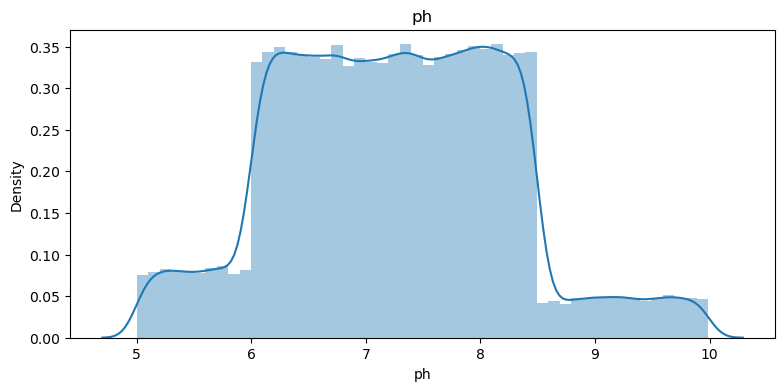

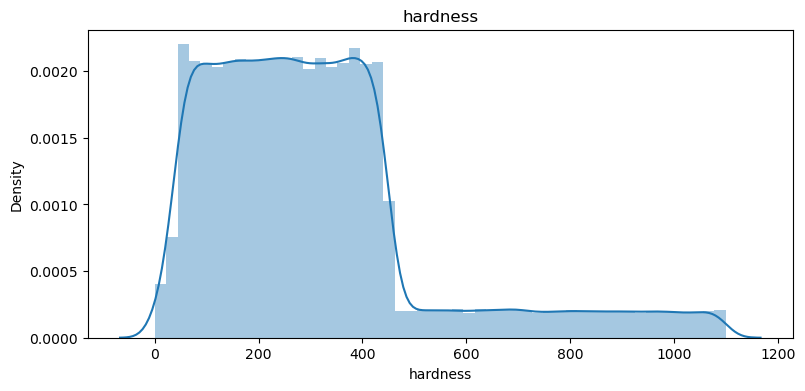

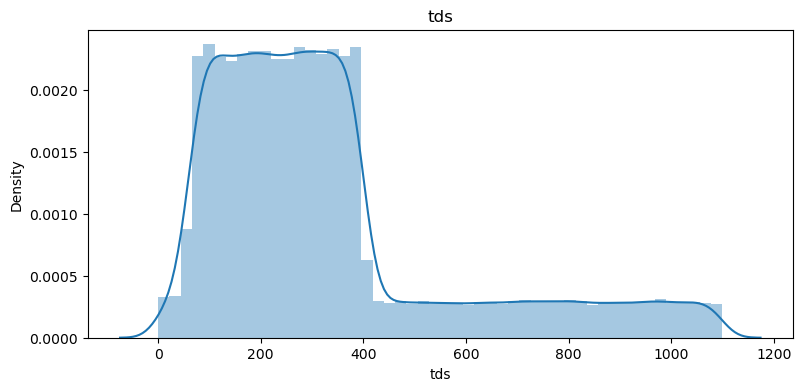

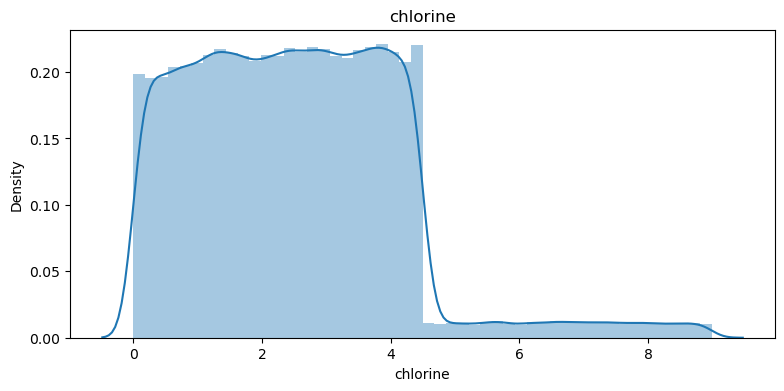

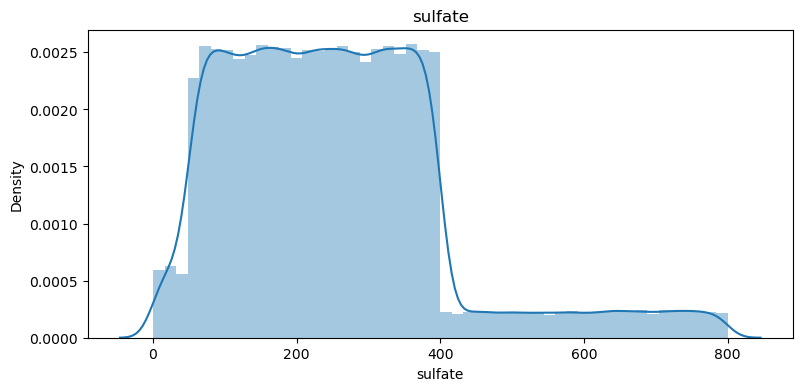

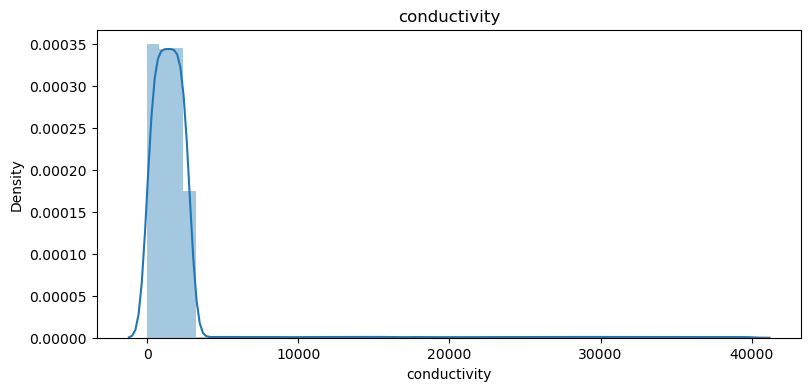

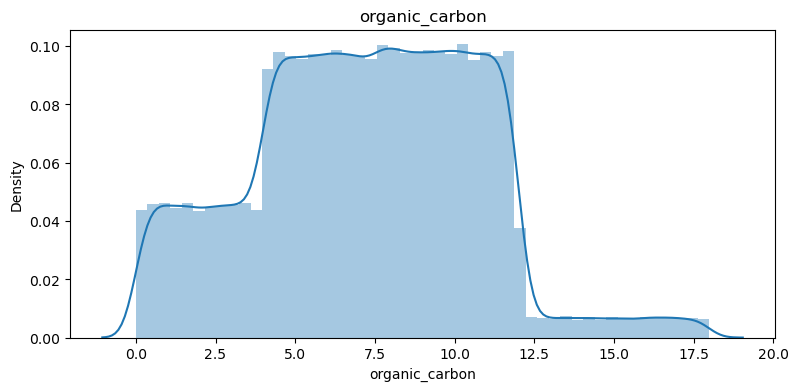

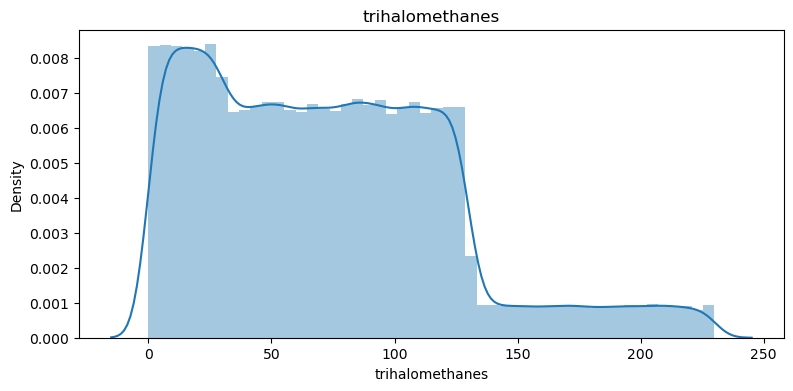

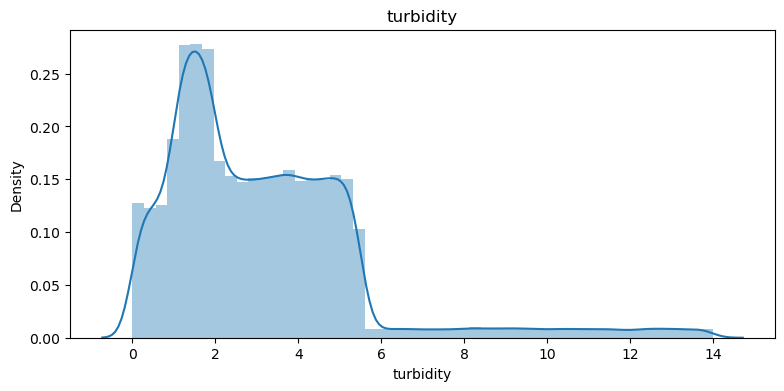

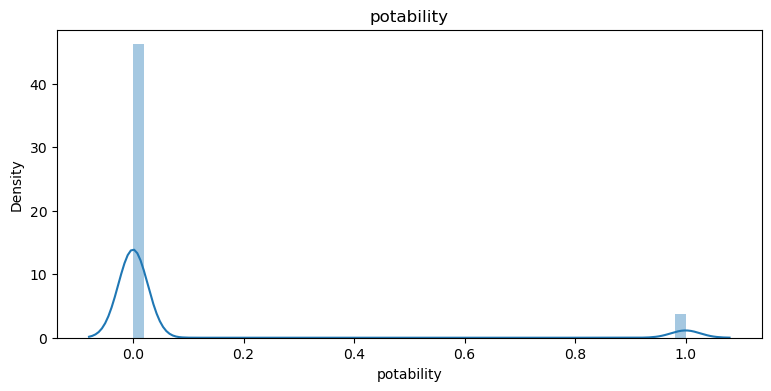

In [11]:
for column in df.columns:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)
    plt.title(column)

In [12]:
df.skew()

ph                 0.178755
hardness           1.484337
tds                1.441334
chlorine           0.887939
sulfate            1.100051
conductivity       6.666645
organic_carbon     0.064538
trihalomethanes    0.742962
turbidity          1.815889
potability         3.195778
dtype: float64

Observation:
Here almost all datapoints are highly skewed except organic_carbon

## Detecting Outliers

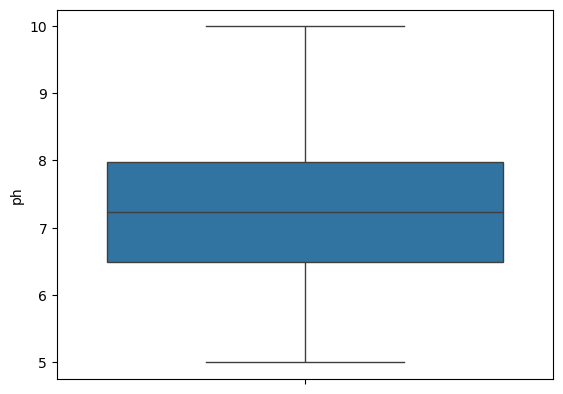

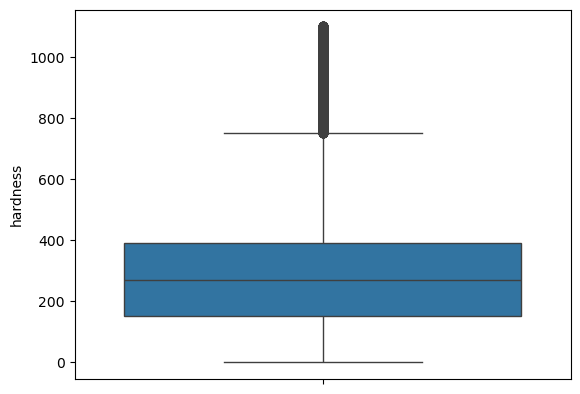

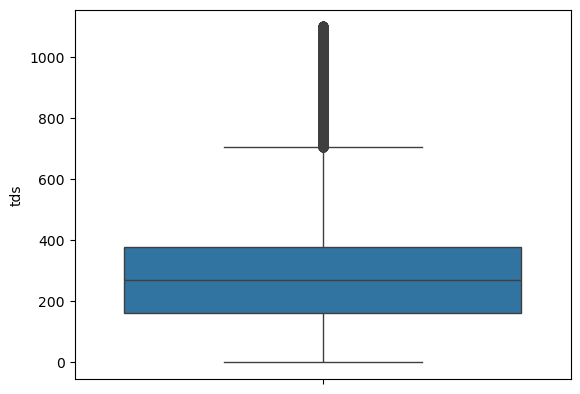

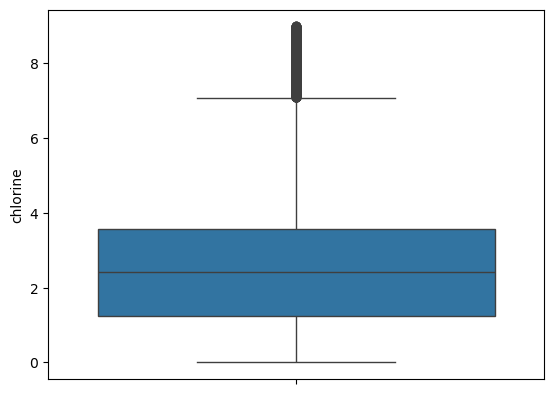

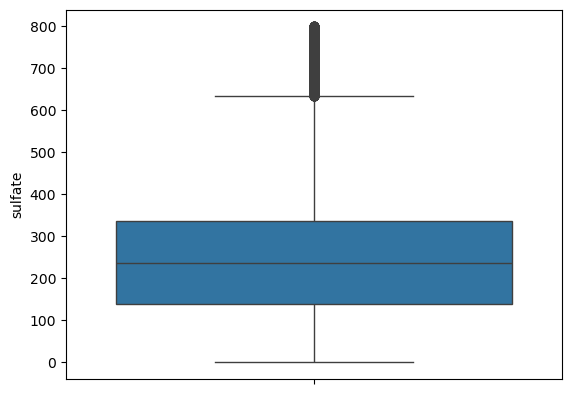

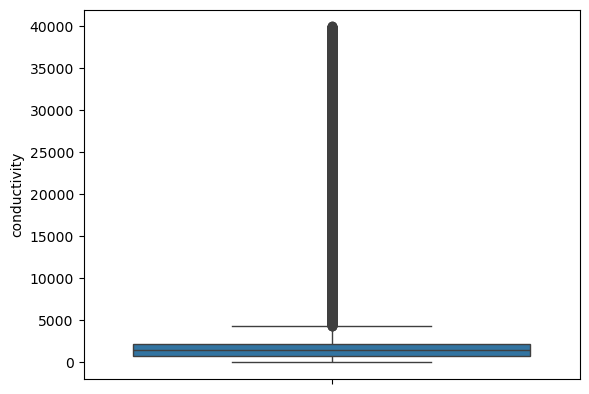

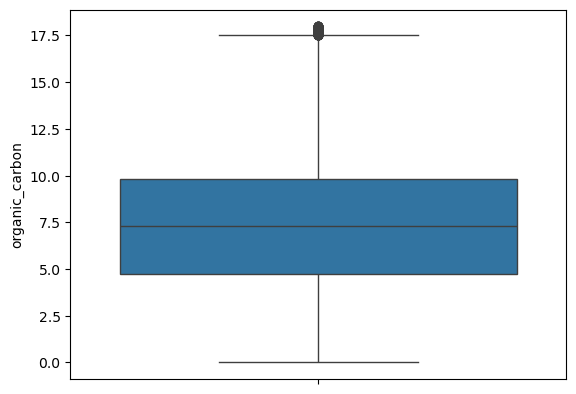

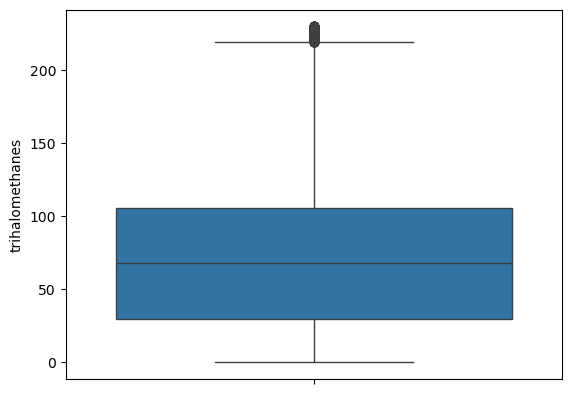

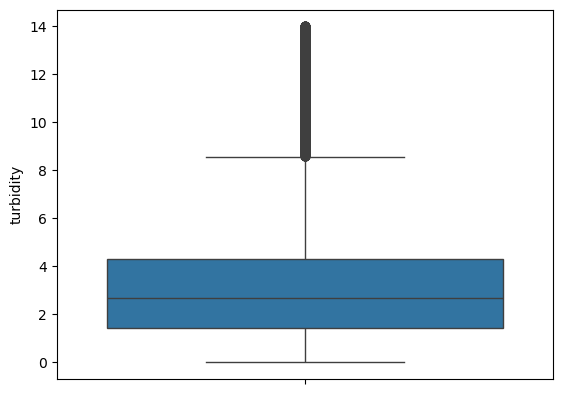

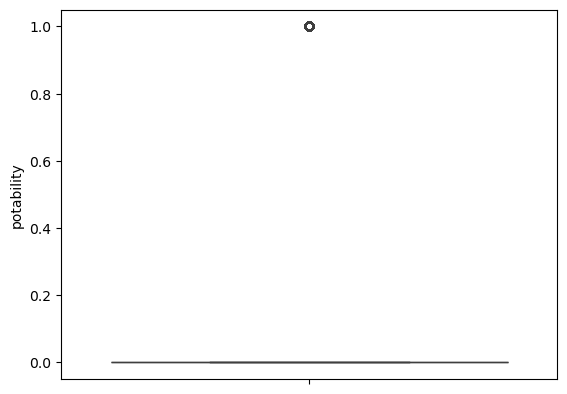

In [15]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [16]:
def identify_outliers(df, column): 
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [17]:
outliers = identify_outliers(df, 'ph')
print(f"Outliers in 'pH':\n{outliers}")

Outliers in 'pH':
Empty DataFrame
Columns: [ph, hardness, tds, chlorine, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity, potability]
Index: []


In [18]:
outliers = identify_outliers(df, 'hardness')
print(f"Outliers in 'hardness':\n{outliers}")

Outliers in 'hardness':
         ph  hardness      tds  chlorine  sulfate  conductivity  \
19     8.05   1002.05   283.46      1.07   322.87       1818.51   
27     6.29    986.37   188.91      3.34   294.05        444.79   
54     7.69    757.89   110.33      1.59   396.37       2301.07   
121    8.76    937.18   209.82      1.50    88.17       1853.51   
130    5.23    930.29   911.91      2.24   756.16       2703.36   
...     ...       ...      ...       ...      ...           ...   
99920  6.73    937.23   309.61      1.16   352.24       1676.44   
99929  8.02    857.14   261.99      4.17   185.30       2649.98   
99932  6.14    942.11   624.89      1.77   235.16       2753.59   
99969  6.50    975.09    65.66      4.00   235.10       2253.83   
99980  6.04   1003.20  1075.16      0.63   317.59       2513.66   

       organic_carbon  trihalomethanes  turbidity  potability  
19               2.45            23.88       4.05           0  
27               4.49            35.93     

# Preprocessing & Cleaning the Data

### 1. As number of null values is less, we consider it dropping them.

In [21]:
df.dropna(inplace=True)

In [22]:
df.isna().sum()

ph                 0
hardness           0
tds                0
chlorine           0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

### 2. Handling Skewness of the datapoints. Applying Cube Root Transformer.

In [24]:
highly_skewed_columns = ['hardness', 'tds', 'conductivity', 'turbidity', 'sulfate']
# Apply cube root transformation
for column in highly_skewed_columns:
    df[column] = np.cbrt(df[column])

In [25]:
df.skew()

ph                 0.179342
hardness           0.102121
tds                0.354884
chlorine           0.881422
sulfate           -0.250028
conductivity       2.039895
organic_carbon     0.064240
trihalomethanes    0.745014
turbidity         -0.067266
potability         3.202639
dtype: float64

In [26]:
highly_skewed_columns = ['conductivity']
for column in highly_skewed_columns:
    df[column] = np.cbrt(df[column])

In [27]:
df.skew()

ph                 0.179342
hardness           0.102121
tds                0.354884
chlorine           0.881422
sulfate           -0.250028
conductivity      -0.063362
organic_carbon     0.064240
trihalomethanes    0.745014
turbidity         -0.067266
potability         3.202639
dtype: float64

### 3. Handling Outliers in the Datapoints.

In [29]:
# Loop through columns to identify and impute outliers 
columns=['hardness', 'tds', 'chlorine', 'sulfate', 'conductivity',
         'organic_carbon', 'trihalomethanes', 'turbidity']
for column in columns:
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR

# Impute outliers with the median of the column 
    median = df[column].median() 
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median

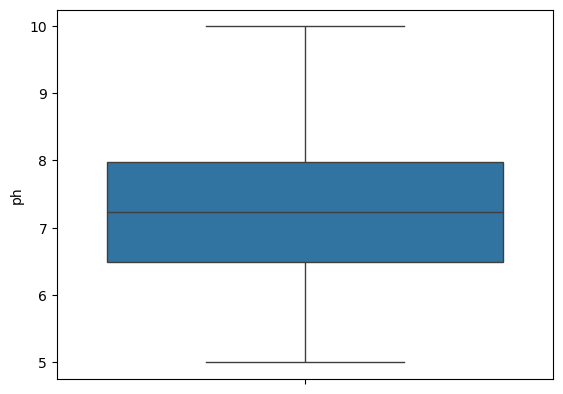

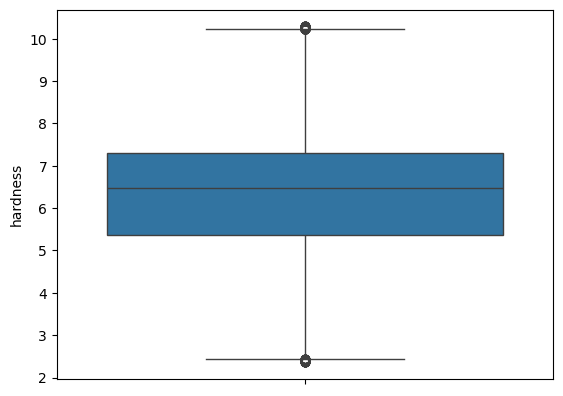

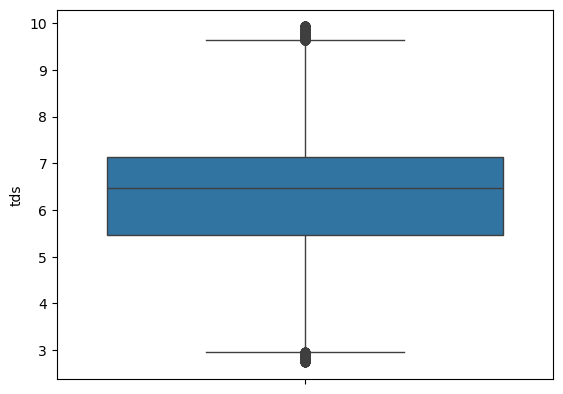

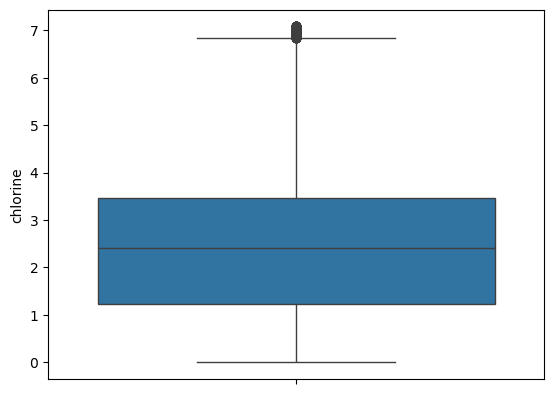

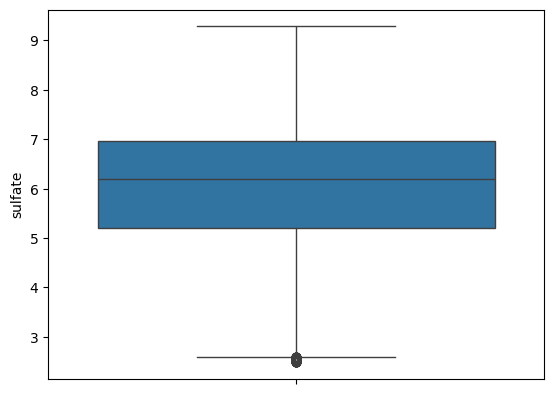

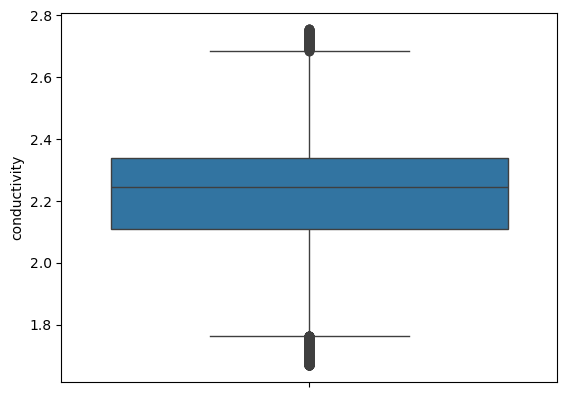

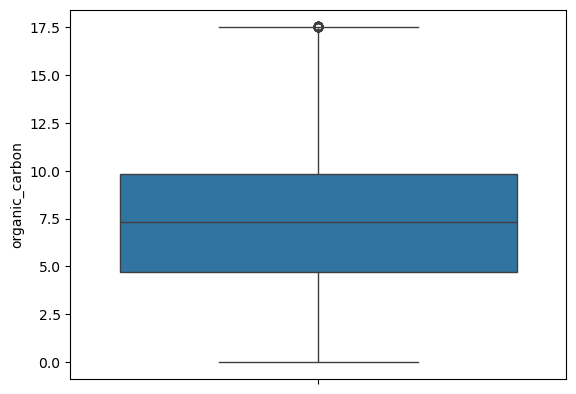

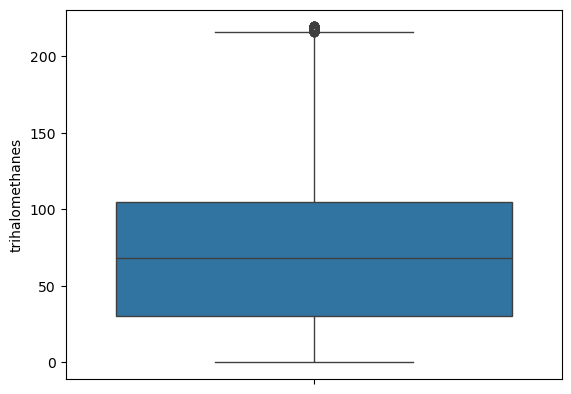

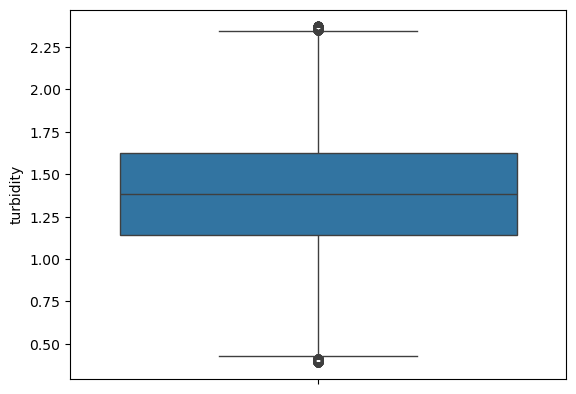

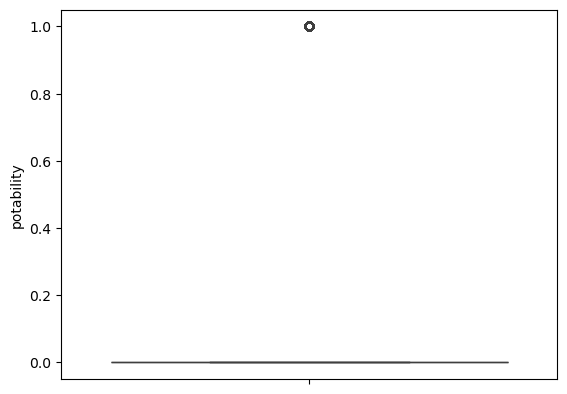

In [30]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

As you can see we have significantly reduce the number of outliers in the datapoints.

### 4. Splitting Data into Train & Test sets

In [33]:
x=df.drop(['potability'],axis=1)
y=df['potability']

In [34]:
x.head(3)

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,7.14,7.611548,8.500623,2.12,5.928693,1.917789,7.22,17.32,1.306477
1,6.41,6.238710,7.292944,3.93,6.790384,1.749270,9.92,20.69,1.274452
2,6.29,5.105620,6.087154,1.46,6.924634,2.240108,8.76,32.87,1.715657


In [35]:
y.head(3)

0    0
1    0
2    0
Name: potability, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

### 5. Normalizing with StandardScaler()

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

# Model Building

## 1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [206]:
lr=LogisticRegression()
#Training the Model
lr.fit(xtrain,ytrain)
#making Prediction
ypred=lr.predict(xtest)

In [208]:
# Accuracy Score & classification report
ac=accuracy_score(ytest,ypred)
print(ac)
print(classification_report(ytest,ypred))
lr1=ac

0.9244131455399061
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25629
           1       0.44      0.06      0.11      2061

    accuracy                           0.92     27690
   macro avg       0.69      0.53      0.53     27690
weighted avg       0.89      0.92      0.90     27690



In [46]:
lr_train_score=lr.score(xtrain,ytrain)
lr_test_score=lr.score(xtest,ytest)
print(f"Train Score:{lr_train_score}")
print(f"Test Score:{lr_test_score}")

Train Score:0.922132796780684
Test Score:0.9244131455399061


As you can see the train and test score for Logistic Regression is almost equal, we can say the model is good fit.

## 2. KNeighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)
ypredkn=kn.predict(xtest)

In [184]:
ac=accuracy_score(ytest,ypredkn)
print(ac)
print(classification_report(ytest,ypredkn))

0.9360780065005417
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     25629
           1       0.59      0.45      0.51      2061

    accuracy                           0.94     27690
   macro avg       0.77      0.71      0.74     27690
weighted avg       0.93      0.94      0.93     27690



In [168]:
kn_train_score=kn.score(xtrain,ytrain)
kn_test_score=kn.score(xtest,ytest)
print(f"Train Score:{kn_train_score}")
print(f"Test Score:{kn_test_score}")

Train Score:0.9559046587215602
Test Score:0.9360780065005417


You can see Train score is greater than the Test score. The Model is slightly overfit. We will try to best fit the model
with the help of hyper parameter tuning by finding an accurate value of n_neighbors.

## HPT for KNeighbors Classifier

In [55]:
acc_list = []
for i in range(21, 36):
    kn= KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain, ytrain)
    ypred = kn.predict(xtest)
    ac = accuracy_score(ytest, ypred)
    acc_list.append(ac)
    print(f"Neighbors: {i}, Accuracy: {ac}")

print("Accuracies for different neighbor values:", acc_list)

Neighbors: 21, Accuracy: 0.9406644998194293
Neighbors: 22, Accuracy: 0.9398338750451426
Neighbors: 23, Accuracy: 0.9406283856988082
Neighbors: 24, Accuracy: 0.9397616468039003
Neighbors: 25, Accuracy: 0.9404117009750813
Neighbors: 26, Accuracy: 0.9394366197183098
Neighbors: 27, Accuracy: 0.9408089563019141
Neighbors: 28, Accuracy: 0.9400144456482484
Neighbors: 29, Accuracy: 0.9405200433369447
Neighbors: 30, Accuracy: 0.939689418562658
Neighbors: 31, Accuracy: 0.9404478150957024
Neighbors: 32, Accuracy: 0.9386782231852654
Neighbors: 33, Accuracy: 0.9400144456482484
Neighbors: 34, Accuracy: 0.939472733838931
Neighbors: 35, Accuracy: 0.9400505597688696
Accuracies for different neighbor values: [0.9406644998194293, 0.9398338750451426, 0.9406283856988082, 0.9397616468039003, 0.9404117009750813, 0.9394366197183098, 0.9408089563019141, 0.9400144456482484, 0.9405200433369447, 0.939689418562658, 0.9404478150957024, 0.9386782231852654, 0.9400144456482484, 0.939472733838931, 0.9400505597688696]


We will set the the value of n_neighbors as 32

## Rebuilding the KNeighbors Classifier.

In [172]:
kn1=KNeighborsClassifier(n_neighbors=32)
kn1.fit(xtrain,ytrain)
ypredkn1=kn1.predict(xtest)

In [212]:
ac=accuracy_score(ytest,ypredkn1)
print(ac)
print(classification_report(ytest,ypredkn1))
kn_1=ac

0.9386782231852654
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     25629
           1       0.75      0.26      0.39      2061

    accuracy                           0.94     27690
   macro avg       0.85      0.63      0.68     27690
weighted avg       0.93      0.94      0.92     27690



In [176]:
kn1_train_score=kn1.score(xtrain,ytrain)
kn1_test_score=kn1.score(xtest,ytest)
print(f"Train Score:{kn1_train_score}")
print(f"Test Score:{kn1_test_score}")

Train Score:0.9392663674353815
Test Score:0.9386782231852654


As we set the value of n_neighbors=32 the model is now good fit.

## 3. SVM Classifier

In [63]:
from sklearn.svm import SVC

In [216]:
svm=SVC()
svm.fit(xtrain,ytrain)
ypredsvm=svm.predict(xtest)
ac=accuracy_score(ytest,ypredsvm)
print(ac)
print(classification_report(ytest,ypredsvm))
svm_train_score=svm.score(xtrain,ytrain)
svm_test_score=kn1.score(xtest,ytest)
print(f"Train Score:{svm_train_score}")
print(f"Test Score:{svm_test_score}")
svm1=ac

0.9469844709281329
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     25629
           1       0.76      0.42      0.54      2061

    accuracy                           0.95     27690
   macro avg       0.86      0.71      0.76     27690
weighted avg       0.94      0.95      0.94     27690

Train Score:0.945921683949853
Test Score:0.9386782231852654


In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the GridSearchCV to the training data
grid.fit(xtrain, ytrain)

# Get the best parameters
best_params = grid.best_params_
print(f"Best parameters found: {best_params}")

# Make predictions on the test data using the best estimator
ypredsvm = grid.best_estimator_.predict(xtest)

# Calculate the accuracy
ac = accuracy_score(ytest, ypredsvm)
print(ac)

# Print the classification report
print(classification_report(ytest, ypredsvm))

# Calculate and print the train and test scores
svm_train_score = grid.best_estimator_.score(xtrain, ytrain)
svm_test_score = grid.best_estimator_.score(xtest, ytest)
print(f"Train Score: {svm_train_score}")
print(f"Test Score: {svm_test_score}")


# 4.Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypreddt=dt.predict(xtest)
ac=accuracy_score(ytest,ypreddt)
print(ac)
print(classification_report(ytest,ypreddt))
dt_train_score=svm.score(xtrain,ytrain)
dt_test_score=kn1.score(xtest,ytest)
print(f"Train Score:{dt_train_score}")
print(f"Test Score:{dt_test_score}")
dt1=ac

0.9907908992416035
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25629
           1       0.94      0.93      0.94      2061

    accuracy                           0.99     27690
   macro avg       0.97      0.97      0.97     27690
weighted avg       0.99      0.99      0.99     27690

Train Score:0.945921683949853
Test Score:0.9386782231852654


# 5.Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypredrf=rf.predict(xtest)
ac=accuracy_score(ytest,ypredrf)
print(ac)
print(classification_report(ytest,ypredrf))
rf_train_score=rf.score(xtrain,ytrain)
rf_test_score=rf.score(xtest,ytest)
print(f"Train Score:{rf_train_score}")
print(f"Test Score:{rf_test_score}")
rf1=ac


0.9925966052726616
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25629
           1       0.94      0.96      0.95      2061

    accuracy                           0.99     27690
   macro avg       0.97      0.98      0.97     27690
weighted avg       0.99      0.99      0.99     27690

Train Score:1.0
Test Score:0.9925966052726616


# 6. XGBoost Classifier

In [139]:
from xgboost import XGBClassifier

In [226]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypredxg=xgb.predict(xtest)
ac=accuracy_score(ytest,ypredxg)
print(ac)
print(classification_report(ytest,ypredxg))
xg_train_score=rf.score(xtrain,ytrain)
xg_test_score=rf.score(xtest,ytest)
print(f"Train Score:{xg_train_score}")
print(f"Test Score:{xg_test_score}")
xgb1=ac

0.9923438064283134
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25629
           1       0.95      0.95      0.95      2061

    accuracy                           0.99     27690
   macro avg       0.97      0.97      0.97     27690
weighted avg       0.99      0.99      0.99     27690

Train Score:1.0
Test Score:0.9925966052726616


# Comparing Accuracies of all the models

,Model,Accuracy_score
4,Random Forest,0.992597
5,XGBoost Classifier,0.992344
3,Decision Tree,0.990791
2,SVM,0.946984
1,KNeighbors Classifier,0.938678
0,Logistic Regression,0.924413


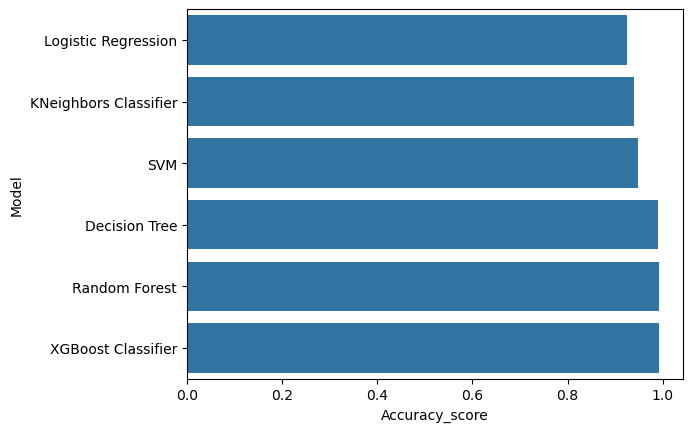

In [228]:
models = pd.DataFrame({
    'Model':['Logistic Regression','KNeighbors Classifier','SVM','Decision Tree','Random Forest','XGBoost Classifier'],
    'Accuracy_score' :[lr1,kn_1,svm1,dt1,rf1,xgb1]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

1. Here we can say that XGBoost classifier, Random Forest and Decision Tree Classifier have the highest accuracies.
2. Also, other three models have gave us a decent accuracy all above 90%.
3. In this project only KNeighbors classifier required Hyper parameter Tuning. Other remaining models have been fairly good fit,
   with a very negligible difference between train and test scores.
4. Handling the skewness and outliers in the dataset was a significant step to attain maximum accuracy for all the models.
5. The further developments in this project will be development of an WEB APPLICATION, where stakeholders can choose model
   of their choice to predict the potability of water by giving necessary inputs into the models